# Lista de Exercício 6
### Introdução à Visão Computacional (SEL0339/SEL5886)

**Instruções:**

 1. Esta lista consiste de 6 exercícios.
 1. Deve-se colocar comentários nos códigos desenvolvidos.
 1. As perguntas devem ser respondidas também como comentários no arquivo.
 1. Colocar seu nome e número USP abaixo.
 1. Quaisquer problemas na execução das listas, entrar em contato com os monitores.
 1. Depois de terminado os exercícios, deve ser gerado um arquivo **extensão .ipynb** para ser enviado ao professor pelo E-DISCIPLINAS da disciplina até a data máxima de entrega.
 1. Caso não seja enviado, o aluno ficará sem nota.


---



 <table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/LAVI-USP/SEL0339-SEL5886_2021/blob/main/praticas/Lista_de_Exercicio_6.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Executar no Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/LAVI-USP/SEL0339-SEL5886_2021/blob/main/praticas/Lista_de_Exercicio_6.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />Ver codigo fonte no GitHub</a>
  </td>
</table>


`Nome: Murilo Henrique Pasini Trevisan `

`Número USP: 9796078 `

### Introdução:

Esta lista de exercícios abordará o tema de operações morfológicas. "As transformações morfológicas são algumas operações simples baseadas na forma da imagem. Normalmente sao executadas em imagens binárias. Elas precisam de duas entradas, uma é a nossa imagem original, a segunda é chamada de elemento estruturante (SE) ou *kernel* que decide a natureza da operação. Dois operadores morfológicos básicos são **Erosão** e **Dilatação**. Em seguida, suas formas variantes como **Abertura**, **Fechamento** etc. também entram em jogo." [1]


<center><img src="https://docs.opencv.org/master/j.png" style="float: left; width: 30%; margin-right: 1%; margin-bottom: 0.5em;"><img src="https://docs.opencv.org/master/erosion.png" style="float: left; width: 30%; margin-right: 1%; margin-bottom: 0.5em;"><img src="https://docs.opencv.org/master/dilation.png" style="float: left; width: 30%; margin-right: 1%; margin-bottom: 0.5em;"></center>
<center><caption><b> Figura 1: </b> Da esquerda para a direita: original, erosão e dilatação.</b></caption></center>
<caption><center> Referência: OpenCV - <a href="https://docs.opencv.org/master/d9/d61/tutorial_py_morphological_ops.html">Morphological Transformations</a>.</center></caption>


Referências:

*   Material da sala de aula;
*   Gonzalez and Woods, Digital Image Processing 4th;
*   [1] OpenCV: [Morphological Transformations](https://docs.opencv.org/master/d9/d61/tutorial_py_morphological_ops.html);

Vamos importar as bibliotecas que iremos utilizar:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

#### **Atenção**: os códigos abaixo são para fazer o download das imagens (EXECUTE-OS). Os mesmos não fazem parte dessa prática. 

In [3]:
import urllib.request

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0339-SEL5886_2021/raw/main/imagens/pratica_06/A.png", "A.png")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0339-SEL5886_2021/raw/main/imagens/pratica_06/B.png", "B.png")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0339-SEL5886_2021/raw/main/imagens/pratica_06/circles.png", "circles.png")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0339-SEL5886_2021/raw/main/imagens/pratica_06/fingerprint.png", "fingerprint.png")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0339-SEL5886_2021/raw/main/imagens/pratica_06/shapes.png", "shapes.png")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0339-SEL5886_2021/raw/main/imagens/pratica_06/texto.png", "texto.png")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0339-SEL5886_2021/raw/main/imagens/pratica_06/elefante.tif", "elefante.tif")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0339-SEL5886_2021/raw/main/imagens/pratica_06/card1.jpg", "card1.jpg")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0339-SEL5886_2021/raw/main/imagens/pratica_06/card2.png", "card2.png")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0339-SEL5886_2021/raw/main/imagens/pratica_06/card3.png", "card3.png")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0339-SEL5886_2021/raw/main/imagens/pratica_06/card4.jpg", "card4.jpg")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0339-SEL5886_2021/raw/main/imagens/pratica_06/ocr_a_reference.png", "ocr_a_reference.png")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0339-SEL5886_2021/raw/main/imagens/pratica_06/ocr_functions.py", "ocr_functions.py")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")

### 1) Operações lógicas em imagens binárias

**Exercício:**

1. Faça a leitura das imagens ```A.png``` e ```B.png```, transforme-as para o tipo binário (*logical*) e realize as operações abaixo. Comente os resultados encontrados.

  *   União $A \cup B$
  *   Interseção $A \cap B$
  *   Diferença $A \, – B$
  *   Diferença $B \, – A$

2. Mostre todos os resultados utilizando *subplots*.

<details>    
<summary>
    <font size="3" color="darkblue"><b>Dicas:</b></font>
</summary>

*  As funções [np.bitwise_xor](https://numpy.org/doc/stable/reference/generated/numpy.bitwise_xor.html), [np.bitwise_or](https://numpy.org/doc/stable/reference/generated/numpy.bitwise_or.html#numpy.bitwise_or) e [np.bitwise_and](https://numpy.org/doc/stable/reference/generated/numpy.bitwise_and.html#numpy.bitwise_and) podem ser úteis.

Text(0.5, 1.0, 'B − A')

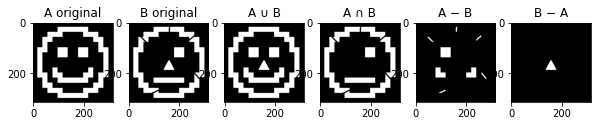

In [4]:
#Seu código começa aqui

A_gray = cv.imread("A.png", cv.IMREAD_GRAYSCALE)
B_gray = cv.imread("B.png", cv.IMREAD_GRAYSCALE)

(thresh, A_by) = cv.threshold(A_gray, 128, 255, cv.THRESH_BINARY | cv.THRESH_OTSU)
(thresh, B_by) = cv.threshold(B_gray, 128, 255, cv.THRESH_BINARY | cv.THRESH_OTSU)


#União
Union_by = np.bitwise_or(A_by, B_by)
#Intersecção
Inter_by = A_by & B_by
#A - B
A_minus_B = A_by - B_by
#B - A 
B_minus_A = B_by - A_by

plt.figure(figsize = (10,10))
plt.subplot(1,6,1)
plt.imshow(A_by, cmap='gray')
plt.title("A original")

plt.subplot(1,6,2)
plt.imshow(B_by, cmap='gray')
plt.title("B original")

plt.subplot(1,6,3)
plt.imshow(Union_by, cmap='gray')
plt.title("A ∪ B")

plt.subplot(1,6,4)
plt.imshow(Inter_by, cmap='gray')
plt.title("A ∩ B")

plt.subplot(1,6,5)
plt.imshow(A_minus_B, cmap='gray')
plt.title("A − B")

plt.subplot(1,6,6)
plt.imshow(B_minus_A, cmap='gray')
plt.title("B − A")




#Seu código termina aqui

### 2) Erosão

"A ideia básica de erosão é apenas como a erosão do solo, ela desgasta os limites do objeto em primeiro plano (sempre tente manter o primeiro plano em branco). Então o que isso faz? O kernel desliza pela imagem (como na convolução 2D - veja a imagem abaixo). Um pixel na imagem original (1 ou 0) será considerado 1 apenas se todos os pixels sob o kernel forem 1, caso contrário, ele é "erodido" (reduzido a zero).

Então o que acontece é que, todos os pixels próximos ao limite serão descartados dependendo do tamanho do kernel. Portanto, a espessura ou o tamanho do objeto em primeiro plano diminui ou simplesmente a região branca diminui na imagem. É útil para remover pequenos ruídos brancos, destacar dois objetos conectados, etc." [1].

<center><img src="https://github.com/LAVI-USP/SEL0339-SEL5886_2021/raw/main/imagens/pratica_06/erosao.gif" width="640" height="298"></center>

<center><caption><b> Figura 2:</b> Animação de uma operação morfológica de erosão.</b></caption></center>
<caption><center> Referência: Peter Corke - <a href="https://www.youtube.com/watch?v=b5lgnNEzGeU">Youtube</a>.</center></caption>

**Exercício:**

1. Erodir a imagem ```circles.png``` usando um elemento estruturante em diferentes formas (elipse, cruz). Utilizar ao menos 2 SE. Tente ajustar o tamanho do elemento para que os objetos da imagem se separem.

2. Em seguida, com um elemento estruturante pequeno, realize a erosão e subtraia o resultado da imagem original.

<details>    
<summary>
    <font size="3" color="darkblue"><b>Dicas:</b></font>
</summary>

*  A função [cv.erode](https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#gaeb1e0c1033e3f6b891a25d0511362aeb) operação de erosão.

*Ex:*
``` python
cv.erode(myImg, SE, iterations = 1)
```




Text(0.5, 1.0, 'Ex 2')

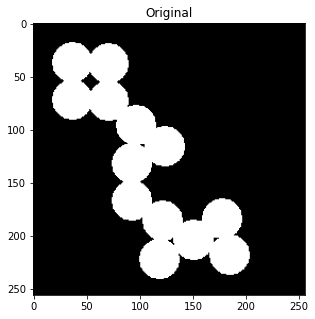

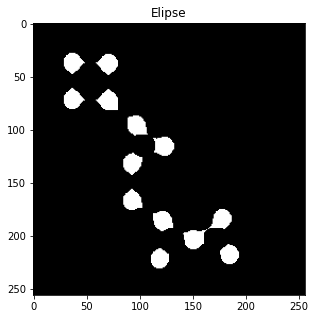

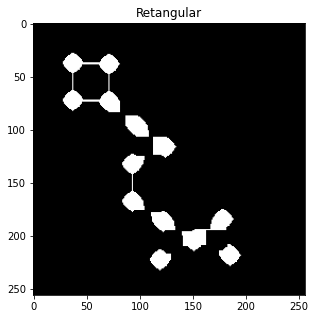

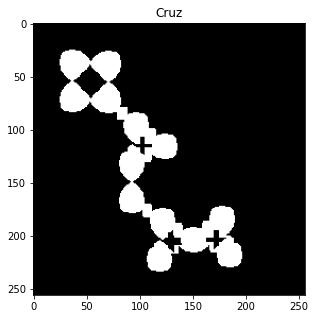

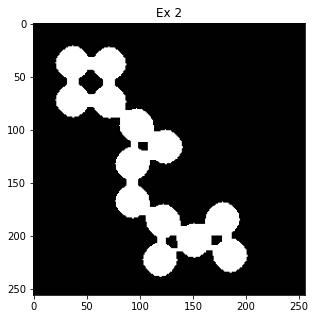

In [21]:
#Seu código começa aqui

#Leitura da imagem
circles = cv.imread("circles.png", cv.IMREAD_GRAYSCALE)

#Binarização
(thresh, circles_by) = cv.threshold(circles, 128, 255, cv.THRESH_BINARY | cv.THRESH_OTSU)

#Construção de dois elementos estruturantes via openCV
elipse_SE = cv.getStructuringElement(cv.MORPH_ELLIPSE, (20,20))
cross_SE  = cv.getStructuringElement(cv.MORPH_CROSS  , (15,15))
rect_SE   = cv.getStructuringElement(cv.MORPH_RECT  , (16,16))


#Aplicação da erosão
circ_erod_elip  = cv.erode(circles_by, elipse_SE, iterations = 1)
circ_erod_cross = cv.erode(circles_by, cross_SE,  iterations = 1)
circ_erod_rect  = cv.erode(circles_by, rect_SE,   iterations = 1)

plt.figure(figsize = (5,5))
plt.imshow(circles_by, cmap='gray')
plt.title("Original")

plt.figure(figsize = (5,5))
plt.imshow(circ_erod_elip, cmap='gray')
plt.title("Elipse")

plt.figure(figsize = (5,5))
plt.imshow(circ_erod_rect, cmap='gray')
plt.title("Retangular")

plt.figure(figsize = (5,5))
plt.imshow(circ_erod_cross, cmap='gray')
plt.title("Cruz")


rect2_SE   = cv.getStructuringElement(cv.MORPH_RECT  , (6,6))

circ_erod_rect2  = cv.erode(circles_by, rect2_SE,   iterations = 1)


img_3 = circles_by - np.bitwise_not(circ_erod_rect2)


plt.figure(figsize = (5,5))
plt.imshow(img_3, cmap='gray')
plt.title("Ex 2")




#Seu código termina aqui

### 3) Dilatação

"É exatamente o oposto da erosão. Aqui, um elemento de pixel é '1' se pelo menos um pixel sob o kernel for '1'. Portanto, aumenta a região branca na imagem ou o tamanho do objeto em primeiro plano aumenta (veja a imagem abaixo). Normalmente, em casos como remoção de ruído, a erosão é seguida de dilatação. Porque a erosão remove os ruídos brancos, mas também encolhe nosso objeto. Então, nós dilatamos. Como o ruído acabou, eles não voltarão, mas nossa área de objeto aumenta. Também é útil para unir partes quebradas de um objeto" [1].

<center><img src="https://github.com/LAVI-USP/SEL0339-SEL5886_2021/raw/main/imagens/pratica_06/dilatacao.gif" width="640" height="298"></center>

<center><caption><b> Figura 3: </b> Animação de uma operação morfológica de dilatação.</b></caption></center>
<caption><center> Referência: Peter Corke - <a href="https://www.youtube.com/watch?v=3IJ8RFtlDLY">Youtube</a>.</center></caption>


**Exercício:**

1. Dilatar a imagem ```texto.png``` usando o seguinte elemento estruturante (SE):

\begin{equation}
SE = 
\begin{bmatrix}
1 & 0 & 1\\
0 & 1 & 0\\
1 & 0 & 1
\end{bmatrix}
\end{equation}

2. Gere os seguintes elementos estruturantes para dilatar a imagem. Mostre esses elementos estruturantes em *subplots*.

  *   Retângulo de tamanho 5;
  *   Cruz de tamanho 7;
  *   Elipse de tamanho 11.

3. Mostre as imagens resultantes e comente os resultados encontrados. Inclua comentários no código acima e conclua sobre o resultado encontrado na imagem após a operação de dilatação.

 
<details>    
<summary>
    <font size="3" color="darkblue"><b>Dicas:</b></font>
</summary>

*  A função [cv.dilate](https://docs.opencv.org/3.4/d4/d86/group__imgproc__filter.html#ga4ff0f3318642c4f469d0e11f242f3b6c) operação de dilatação.
*  A função [cv.getStructuringElement](https://docs.opencv.org/master/d4/d86/group__imgproc__filter.html#gac342a1bb6eabf6f55c803b09268e36dc) gera os elementos estruturantes pré-definidos.
*  Aqui está o [link](https://docs.opencv.org/master/d4/d86/group__imgproc__filter.html#gac2db39b56866583a95a5680313c314ad) onde são encontrados os elementos estruturantes pré-definidos disponíveis.
*  Você pode criar elementos estruturantes e passar como argumento para a função de dilatação. 

*Ex:*
``` python
SE = cv.getStructuringElement(cv.MORPH_RECT,(Size,Size))
cv.dilate(myImg, SE, iterations = 1)
```

Text(0.5, 1.0, 'Cruz')

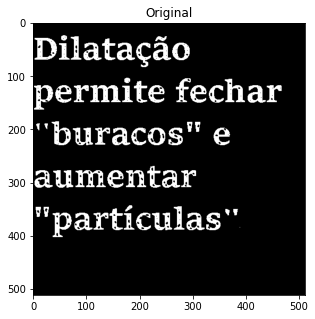

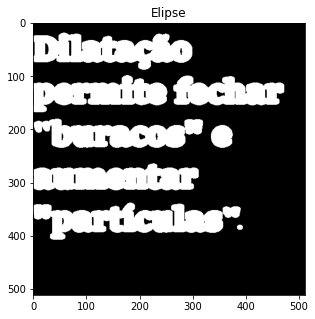

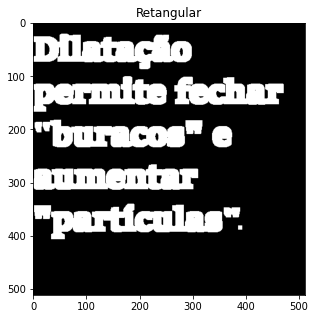

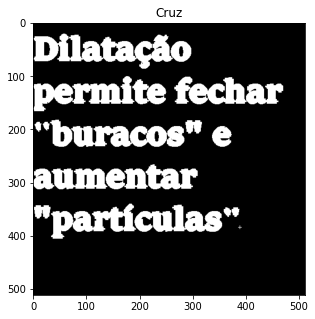

In [22]:
#Seu código começa aqui

#Leitura da imagem
txt = cv.imread("texto.png", cv.IMREAD_GRAYSCALE)

#Binarização
(thresh, txt_by) = cv.threshold(txt, 128, 255, cv.THRESH_BINARY | cv.THRESH_OTSU)

#Construção dos elementos estruturantes via openCV

gen_SE =  np.array(((1, 0, 1),
                    (0, 1, 0),
                    (1, 0, 1)))

elipse_SE = cv.getStructuringElement(cv.MORPH_ELLIPSE, (11,11))
cross_SE  = cv.getStructuringElement(cv.MORPH_CROSS  , (7,7))
rect_SE   = cv.getStructuringElement(cv.MORPH_RECT  , (8,8))

#Aplicação da dilatação
#txt_dilat_SEgen = cv.dilate(txt_by, gen_SE,    iterations = 1) #opneCV não reconhecendo o SE
txt_dilat_elip  = cv.dilate(txt_by, elipse_SE, iterations = 1)
txt_dilat_cross = cv.dilate(txt_by, cross_SE,  iterations = 1)
txt_dilat_rect  = cv.dilate(txt_by, rect_SE,   iterations = 1)


#Plot das imagens
plt.figure(figsize = (5,5))
plt.imshow(txt_by, cmap='gray')
plt.title("Original")

#plt.figure(figsize = (5,5))
#plt.imshow(txt_dilat_SEgen)
#plt.title("SE dado")

plt.figure(figsize = (5,5))
plt.imshow(txt_dilat_elip, cmap='gray')
plt.title("Elipse")

plt.figure(figsize = (5,5))
plt.imshow(txt_dilat_rect, cmap='gray')
plt.title("Retangular")

plt.figure(figsize = (5,5))
plt.imshow(txt_dilat_cross, cmap='gray')
plt.title("Cruz")

#Pode-se notar que o uso da dilatação removeu as falhas que estavam na imagem
#além de aumentar a imagem, como era esperado pela dilatação
#a imagem em que foi utilizado o SE em cruz obteve melhor visualização do texto


#Seu código termina aqui

### 4) Abertura e Fechamento


Abertura é apenas um nome dado a operação de erosão seguida de dilatação. É útil na remoção de ruído, como no exemplo da figura abaixo.


<center><img src="https://docs.opencv.org/master/opening.png" width="224" height="150"></center>

<center><caption><b> Figura 4: </b> Operação morfológica de abertura.</b></caption></center>
<caption><center> Referência: OpenCV - <a href="https://docs.opencv.org/master/d9/d61/tutorial_py_morphological_ops.html">Morphological Transformations</a>.</center></caption>

O fechamento é o processo inverso da abertura, ou seja, dilatação seguida por erosão. É útil para fechar pequenos orifícios dentro dos objetos em primeiro plano ou pequenos pontos pretos no objeto.

<center><img src="https://docs.opencv.org/master/closing.png" width="224" height="150"></center>

<center><caption><b> Figura 5: </b> Operação morfológica de fechamento.</b></caption></center>
<caption><center> Referência: OpenCV - <a href="https://docs.opencv.org/master/d9/d61/tutorial_py_morphological_ops.html">Morphological Transformations</a>.</center></caption>




4.1) **Exercício:**

1. Aplicar os seguintes filtros morfológicos na imagem ```shapes.png```:

  *   Abertura, utilizando um elemento estruturante quadrado de largura 10;
  *   Fechamento, com o mesmo elemento estruturante anterior.
  *   Uma abertura seguida de um fechamento, com o mesmo elemento estruturante anterior.
  *   Repetir o item anterior variando a altura do elemento estruturante para 5 e depois para 15. Analisar os resultados encontrados.

2. Conclua a respeito dos resultados encontrados em todos os itens acima.

<details>    
<summary>
    <font size="3" color="darkblue"><b>Dicas:</b></font>
</summary>

*  A função [cv.morphologyEx](https://docs.opencv.org/master/d4/d86/group__imgproc__filter.html#ga67493776e3ad1a3df63883829375201f) realiza diversas operações de morfologia. Os diferentes tipos de operações podem ser consultados [aqui](https://docs.opencv.org/master/d4/d86/group__imgproc__filter.html#ga7be549266bad7b2e6a04db49827f9f32).

*Ex:*
``` python
cv.morphologyEx(myImg, cv.MORPH_OPEN , SE)
cv.morphologyEx(myImg, cv.MORPH_CLOSE, SE)
```

Text(0.5, 1.0, 'shape open/close SE15')

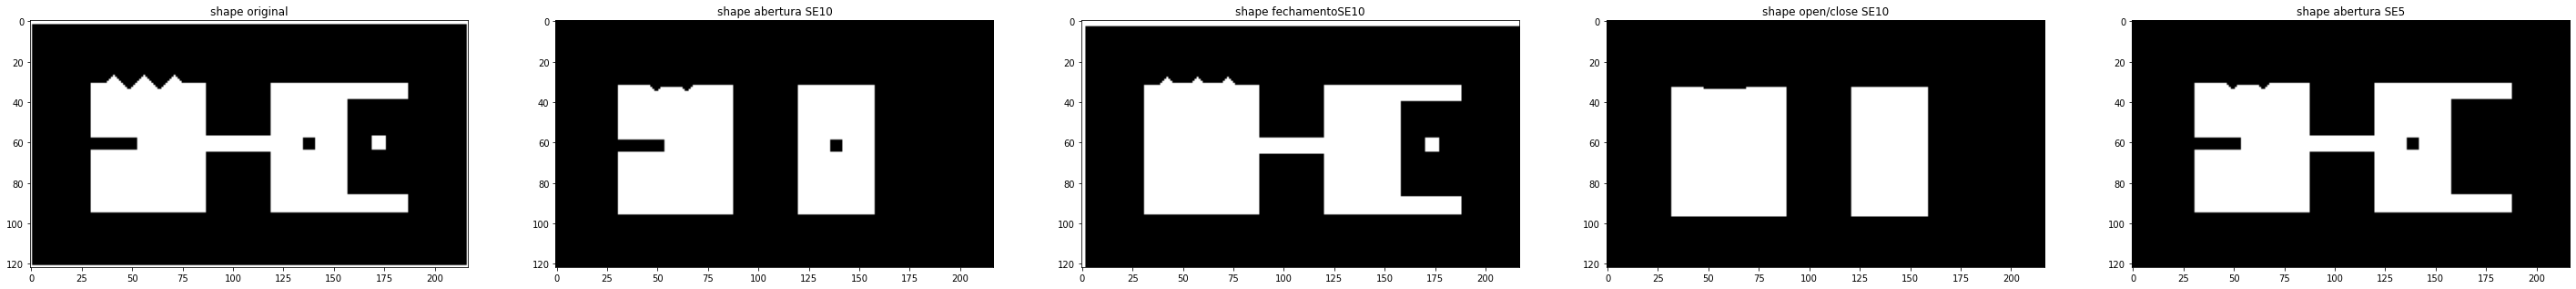

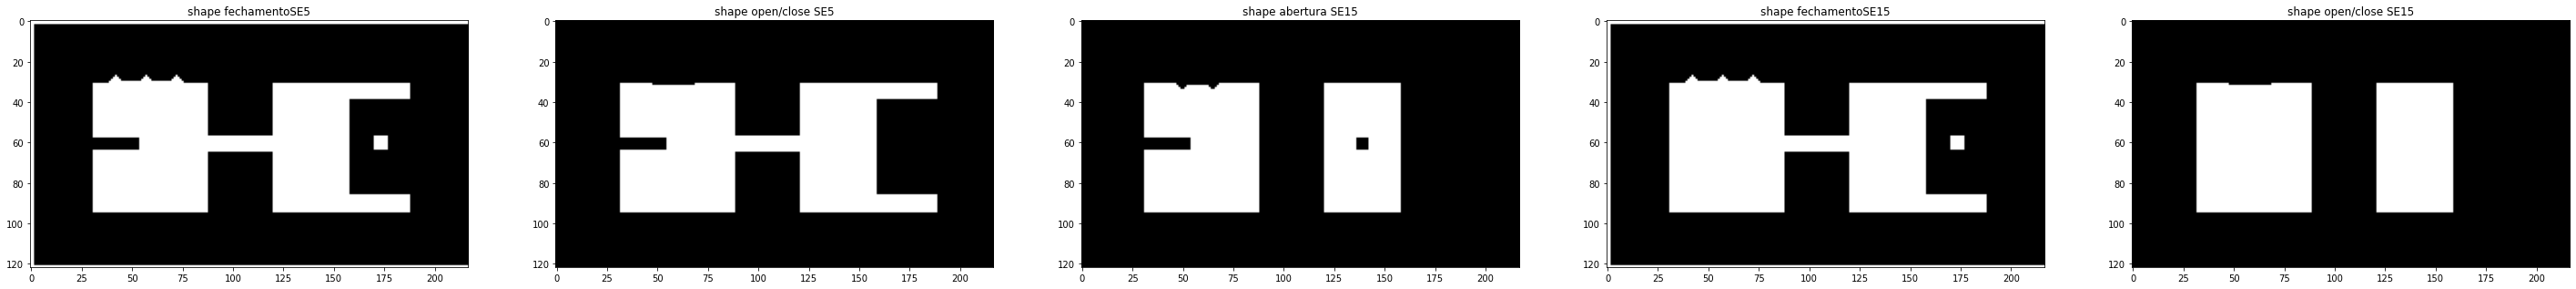

In [7]:
#Seu código começa aqui

#Leitura da imagem
shape = cv.imread("shapes.png", cv.IMREAD_GRAYSCALE)

#Binarização
(thresh, shape_by) = cv.threshold(shape, 128, 255, cv.THRESH_BINARY | cv.THRESH_OTSU)

#Construção dos elementos estruturantes via openCV
rect10_SE = cv.getStructuringElement(cv.MORPH_RECT , (10,10))
rect5_SE  = cv.getStructuringElement(cv.MORPH_RECT , (10,5 ))
rect15_SE = cv.getStructuringElement(cv.MORPH_RECT , (10,15))

#Abertura e fechamento no primeiro SE
shape_open10  = cv.morphologyEx(shape_by, cv.MORPH_OPEN  , rect10_SE)
shape_close10 = cv.morphologyEx(shape_by, cv.MORPH_CLOSE , rect10_SE)

#Abertura seguida de fechamento no primeiro SE
shape_open_close10 = cv.morphologyEx(shape_open10, cv.MORPH_CLOSE , rect10_SE)

#Abertura e fechamento no segundo SE
shape_open5  = cv.morphologyEx(shape_by, cv.MORPH_OPEN  , rect5_SE)
shape_close5 = cv.morphologyEx(shape_by, cv.MORPH_CLOSE , rect5_SE)

#Abertura seguida de fechamento no segundo SE
shape_open_close5 = cv.morphologyEx(shape_open5, cv.MORPH_CLOSE , rect5_SE)

#Abertura e fechamento no terceiro SE
shape_open15  = cv.morphologyEx(shape_by, cv.MORPH_OPEN  , rect15_SE)
shape_close15 = cv.morphologyEx(shape_by, cv.MORPH_CLOSE , rect15_SE)

#Abertura seguida de fechamento no terceiro SE
shape_open_close15 = cv.morphologyEx(shape_open15, cv.MORPH_CLOSE , rect15_SE)




plt.figure(figsize = (50,50))
plt.subplot(1,5,1)
plt.imshow(shape_by, cmap='gray')
plt.title("shape original")

plt.subplot(1,5,2)
plt.imshow(shape_open10, cmap='gray')
plt.title("shape abertura SE10")

plt.subplot(1,5,3)
plt.imshow(shape_close10, cmap='gray')
plt.title("shape fechamentoSE10")

plt.subplot(1,5,4)
plt.imshow(shape_open_close10, cmap='gray')
plt.title("shape open/close SE10")

plt.subplot(1,5,5)
plt.imshow(shape_open5, cmap='gray')
plt.title("shape abertura SE5")

plt.figure(figsize = (50,50))
plt.subplot(1,5,1)
plt.imshow(shape_close5, cmap='gray')
plt.title("shape fechamentoSE5")

plt.subplot(1,5,2)
plt.imshow(shape_open_close5, cmap='gray')
plt.title("shape open/close SE5")

plt.subplot(1,5,3)
plt.imshow(shape_open15, cmap='gray')
plt.title("shape abertura SE15")

plt.subplot(1,5,4)
plt.imshow(shape_close15, cmap='gray')
plt.title("shape fechamentoSE15")

plt.subplot(1,5,5)
plt.imshow(shape_open_close15, cmap='gray')
plt.title("shape open/close SE15")

#Como podemos notar as imagens somente foram separadas quando aplicados elementos
#estruturantes maiores que 10, além disso nota-se o efeito de remoção de ruídos
#da abertura e da remoção de espaços em falta no fechamento, como esperado pela teoria



#Seu código termina aqui

4.2) **Exercício:**

1. Aplicar os seguintes filtros morfológicos na imagem ```fingerprint.png```:

  *   Uma abertura seguida de um fechamento com um elemento estruturante em formato de cruz de tamanho 3;
  *   Um fechamento seguido de uma abertura com um elemento estruturante em formato de cruz de tamanho 3.

2. Conclua a respeito dos resultados encontrados em todos os itens acima.

Text(0.5, 1.0, 'finger close/open SE3')

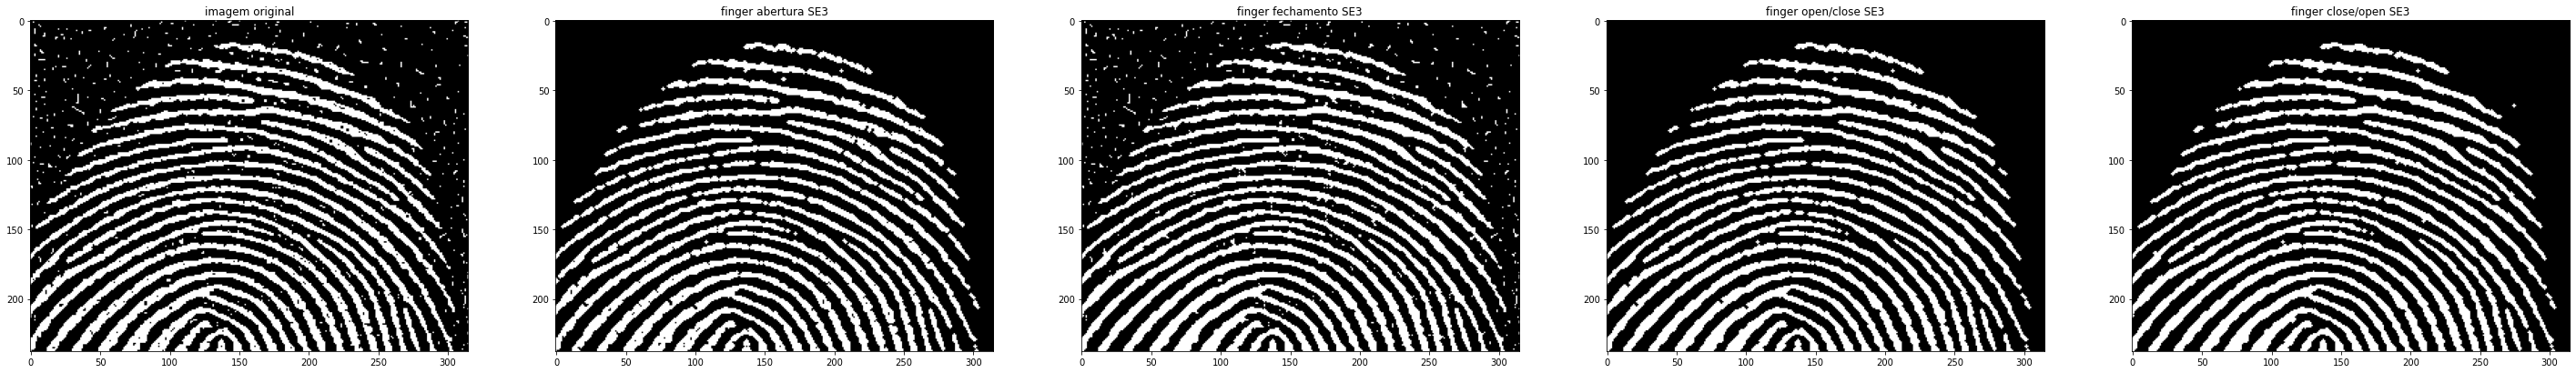

In [14]:
#Seu código começa aqui

#Leitura da imagem
fingerprint = cv.imread("fingerprint.png", cv.IMREAD_GRAYSCALE)

#Binarização
(thresh, finger_by) = cv.threshold(fingerprint, 128, 255, cv.THRESH_BINARY | cv.THRESH_OTSU)

#Construção do elemento estruturante via openCV
cross_SE3  = cv.getStructuringElement(cv.MORPH_CROSS  , (3,3))

#Abertura
finger_open3  = cv.morphologyEx(finger_by, cv.MORPH_OPEN  , cross_SE3)
#Fechamento
finger_close3 = cv.morphologyEx(finger_by, cv.MORPH_CLOSE , cross_SE3)

#Abertura seguida de fechamento
finger_open_close = cv.morphologyEx(finger_open3, cv.MORPH_CLOSE , cross_SE3)

#Fechamento seguido de abertura
finger_close_open = cv.morphologyEx(finger_close3, cv.MORPH_OPEN  , cross_SE3)

plt.figure(figsize = (50,50))
plt.subplot(1,5,1)
plt.imshow(finger_by, cmap='gray')
plt.title("imagem original")

plt.subplot(1,5,2)
plt.imshow(finger_open3, cmap='gray')
plt.title("finger abertura SE3")

plt.subplot(1,5,3)
plt.imshow(finger_close3, cmap='gray')
plt.title("finger fechamento SE3")

plt.subplot(1,5,4)
plt.imshow(finger_open_close, cmap='gray')
plt.title("finger open/close SE3")

plt.subplot(1,5,5)
plt.imshow(finger_close_open, cmap='gray')
plt.title("finger close/open SE3")

#Podemos notar que em ambos os métodos foram removidos os ruídos da imagem e 
#as imperfeições na impressão digital foram atenuadas, formando traços com melhor
#visualização, além disso, apesar das imagens serem diferentes quando se alterou
#a ordem dos processos, ambas obtiveram resultados satisfatórios para o problema

#Seu código termina aqui

### 5) Dilatação e Erosão em imagens em escala de cinza

**Exercício:**

1. Faça a dilatação e erosão (separadamente) em escala de cinza da imagem ```elefante.tif``` usando Elemento Estruturante em forma de:

  *   Retângulo de tamanho 5;
  *   Elipse de tamanho 5.

2. Conclua a respeito dos resultados encontrados em todos os itens acima.

Text(0.5, 1.0, 'dilatação retangulo')

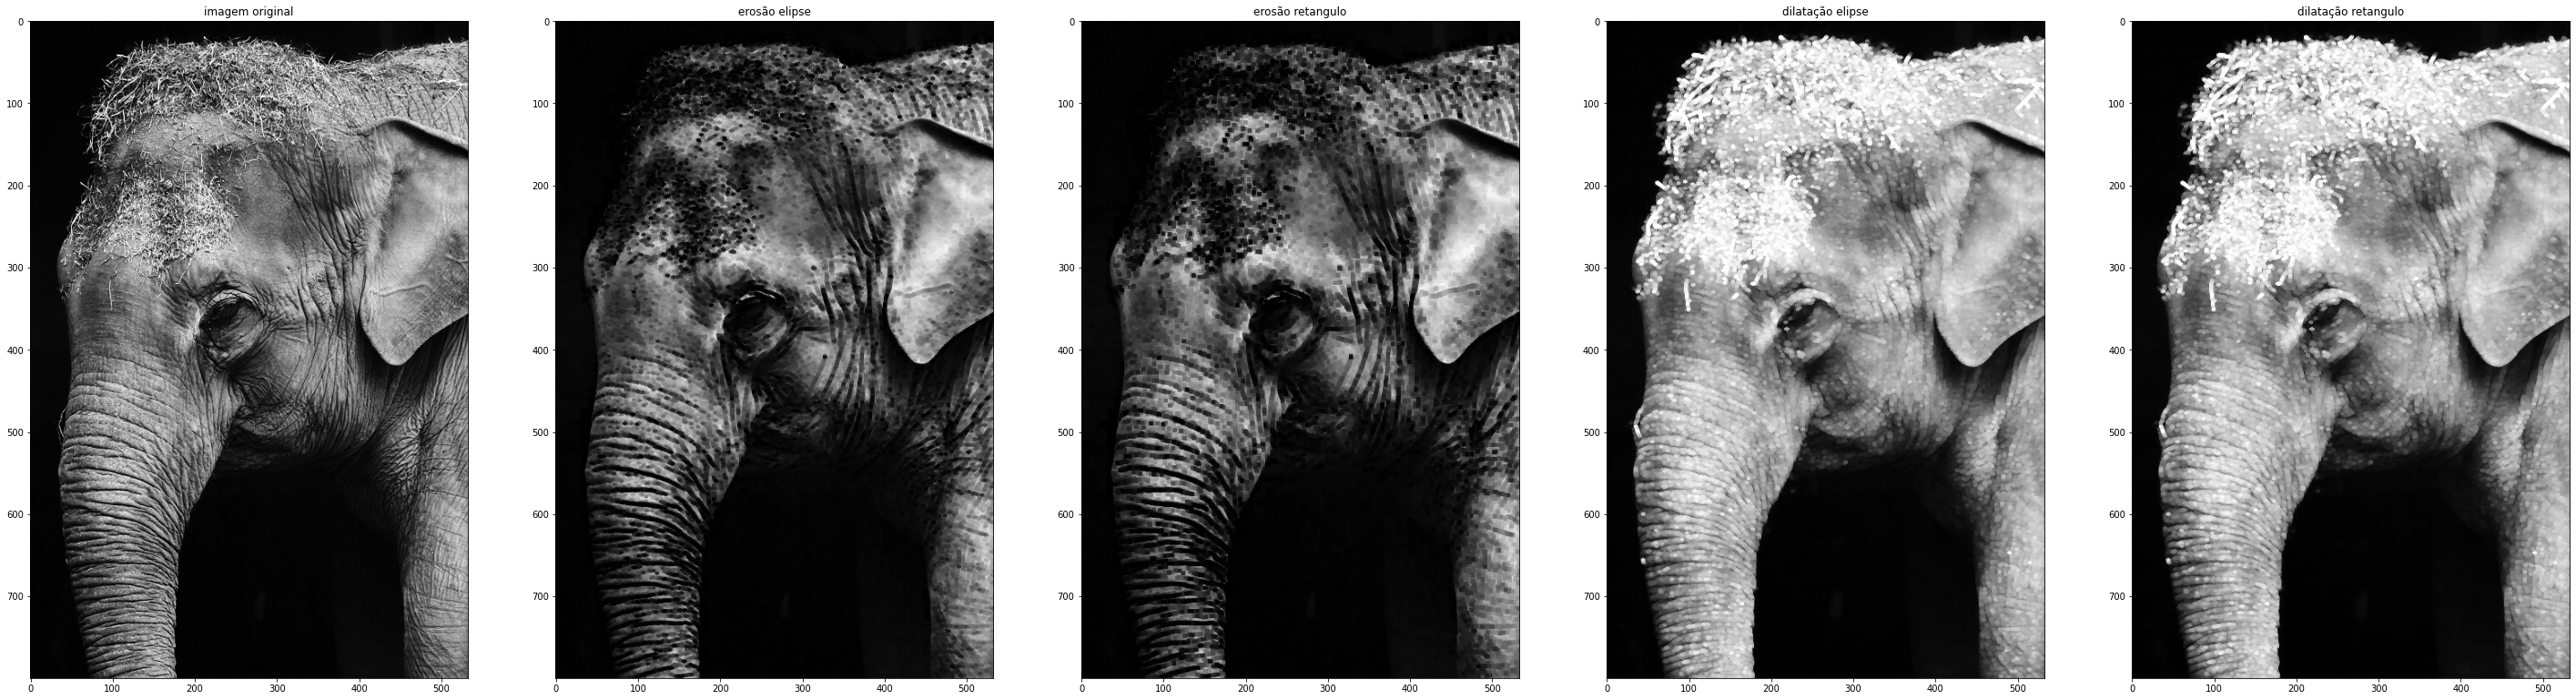

In [23]:
#Seu código começa aqui

#Leitura da imagem
elep = cv.imread("elefante.tif", cv.IMREAD_GRAYSCALE)

#Construção dos elementos estruturantes via openCV
elipse_SE = cv.getStructuringElement(cv.MORPH_ELLIPSE, (5,5))
rect_SE   = cv.getStructuringElement(cv.MORPH_RECT  , (5,5))

#Erosão e dilatação usando morphology ex
elep_erode_elip  = cv.morphologyEx(elep, cv.MORPH_ERODE, elipse_SE)
elep_erode_rec   = cv.morphologyEx(elep, cv.MORPH_ERODE, rect_SE)
elep_dilate_elip = cv.morphologyEx(elep, cv.MORPH_DILATE, elipse_SE)
elep_dilate_rec  = cv.morphologyEx(elep, cv.MORPH_DILATE, rect_SE)

plt.figure(figsize = (50,50))
plt.subplot(1,5,1)
plt.imshow(elep, cmap='gray')
plt.title("imagem original")

plt.subplot(1,5,2)
plt.imshow(elep_erode_elip, cmap='gray')
plt.title("erosão elipse")

plt.subplot(1,5,3)
plt.imshow(elep_erode_rec, cmap='gray')
plt.title("erosão retangulo")

plt.subplot(1,5,4)
plt.imshow(elep_dilate_elip, cmap='gray')
plt.title("dilatação elipse")

plt.subplot(1,5,5)
plt.imshow(elep_dilate_elip, cmap='gray')
plt.title("dilatação retangulo")

#em niveis de cinza os efeitos de erosão e dilatação são ligeiramente diferentes
#isto se deve ao fato que, em imagens binarias, o valor era alternado entre
#o valor 0 e 1, pois somente haviam estes dois valores, já em imagens em niveis
#de cinza, o efeito é de atenuação e amplificação dos niveis de cinza, portanto
#não são removidos trechos das imagens, mas sim atenuados ou amplificados, como
#pode ser visto nas imagens geradas, onde trechos ficaram mais escuros na erosão
# e na dilatação eles ficaram mais claros




#Seu código termina aqui

### 6) Aplicação

Você foi contratado por uma empresa de *e-commerce* para facilitar a vida de seus clientes ao inserir as informações do cartão de crédito no momento da compra.

Para isso, você está desenvolvendo um aplicativo de celular que irá utilizar a câmera e assim o usuário apontará para seu cartão e você deverá fazer a leitura dos números por meio de técnicas de visão computacional.

<center><img src="https://github.com/LAVI-USP/SEL0339-SEL5886_2021/raw/main/imagens/pratica_06/card1.jpg" width="224" height="150"></center>

<center><caption><b> Figura 6: </b> Cartão de crédito.</b></caption></center>

Para isso, vamos utilizar técnicas para o Reconhecimento Ótico de Caracteres (*Optical Character Recognition* - [OCR](https://en.wikipedia.org/wiki/Optical_character_recognition)). 

Perceba que esse método utiliza técnicas convencionais de visão computacional, tais como: operações morfológicas, métodos de segmentação e classificação por comparação de templates. Naturalmente, o método tem suas limitações e você observará isso. 

**Exercício:**

1. Faça a leitura da imagem ```card1.jpg```, converta-a para o tamanho $altura:189 \times largura:300$. Em seguida converta-a para nível de cinza. 

2. Crie dois elementos estruturantes que iremos utilizar:

  *   Retângulo de tamanho $3 \times 9$;
  *   Quadrado de tamanho $5 \times 5$.

3. Após a operação de segmentação por Otsu (iremos ver essa técnica nas próximas listas), observe que os números foram segmentados corretamente. No entanto, diversas outras coisas também foram. Para que possamos identificar de maneira correta os 4 grupos de 4 números, utilize a operação morfológica de fechamento para juntar o grupo de 4 números em um só, criando assim uma máscara:

   *   Aplique uma operação de **fechamento** com o SE retangular na imagem ```thresh```;
   *   Aplique uma operação de **fechamento** com o SE quadrado na imagem resultante da operação anterior. Atribua esse resultado a uma variável chamada ```mask```.

5. Por fim, mostre o resultado gerado pela função ```ocr.find_card_numbers```.

4. 3 diferentes imagens de cartões de créditos são fornecidas. Teste-as e conclua algo sobre o resultado delas. Sinta-se à vontade para buscar outras imagens na internet e testar os resultados. 

Referência:

*   Credit Card OCR with OpenCV and Python - [Pyimagesearch](https://www.pyimagesearch.com/2017/07/17/credit-card-ocr-with-opencv-and-python/).

<details>    
<summary>
    <font size="3" color="darkblue"><b>Dicas:</b></font>
</summary>

*  Os nomes das variáveis já estão escritas no código. Utilize essa mesma nomenclatura pois algumas funções já escritas dependem dessas variáveis. Escreva seu código os estão as palavras ```None```.

*  Fique atento as indicações onde seu código deve começar e terminar. Não altere as funções fora das indicações.

*  Caso você tenha interesse em saber como está sendo feita a classificação, visite o blog mencionado nas referências e também o código ```ocr_functions.py```.

Text(0.5, 1.0, 'dilatação retangulo')

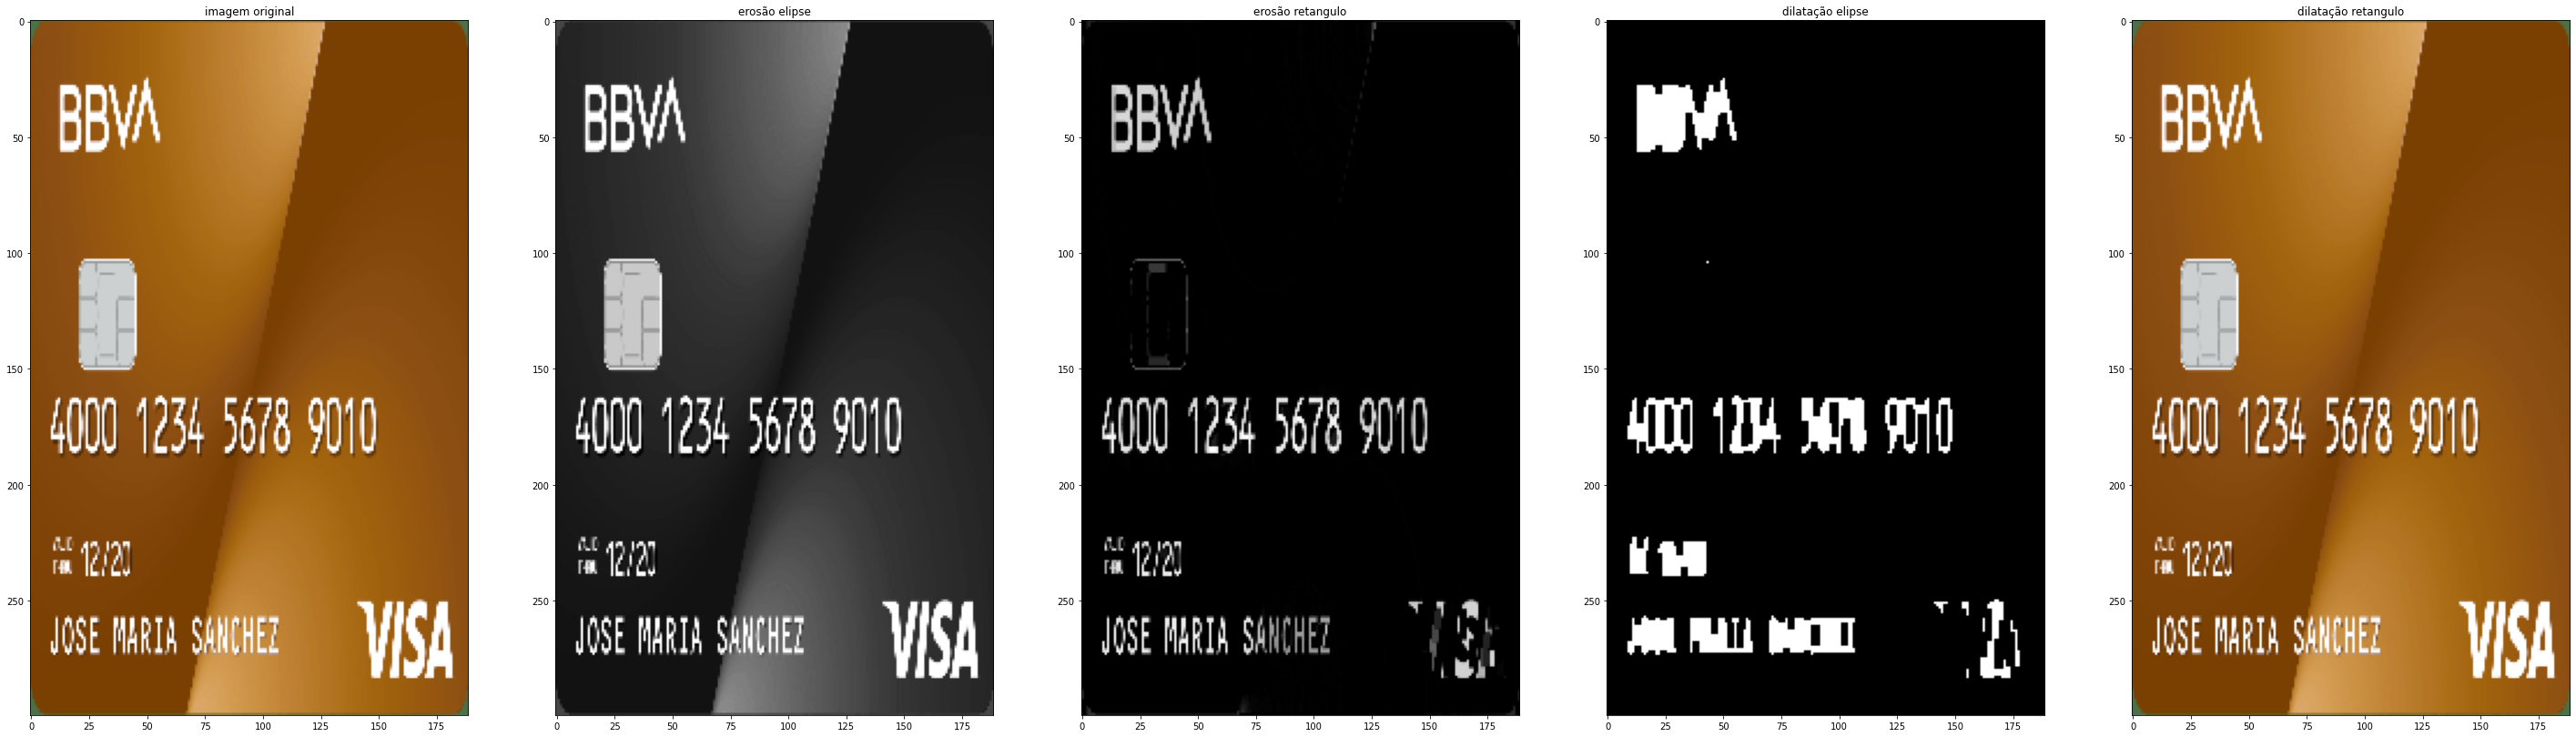

In [51]:
# O nome das diversas imagens:
# | "card2.png" | "card3.png" | "card4.jpg" |

from ocr_functions import ocr_Helper

# Função que nos auxiliará a classificar os dígitos
ocr = ocr_Helper()


## -- Seu código começa AQUI -- ##
image_rgb = cv.imread("card2.png")
image_rgb_resize = cv.resize(image_rgb, (189,300))
image_gray = cv.cvtColor(image_rgb_resize, cv.COLOR_BGR2GRAY)

kernel_rect = cv.getStructuringElement(cv.MORPH_RECT, (3,9))   # SE retangular
kernel_sq   = cv.getStructuringElement(cv.MORPH_RECT, (5,5))   # SE quadrado
## -- Seu código termina AQUI -- ##


image_rgb = image_rgb_resize

# Operação morfológica que resulta na diferença entre uma abertura e a
# imagem original. 
tophat = cv.morphologyEx(image_gray, cv.MORPH_TOPHAT, kernel_rect)

# Segmentação pelo método de Otsu
thresh = cv.threshold(tophat, 0, 255,cv.THRESH_BINARY | cv.THRESH_OTSU)[1]


## -- Seu código começa AQUI -- ##
close_kernel_rect = cv.morphologyEx(thresh, cv.MORPH_CLOSE, kernel_rect)
mask = cv.morphologyEx(close_kernel_rect, cv.MORPH_CLOSE, kernel_sq)
## -- Seu código termina AQUI -- ##


image_out = ocr.find_card_numbers(image_rgb, image_gray, mask)


## -- Seu código começa AQUI -- ##
# Mostrar a imagem "image_out" aqui

plt.figure(figsize = (50,50))
plt.subplot(1,5,1)
plt.imshow(image_rgb)
plt.title("imagem original")

plt.subplot(1,5,2)
plt.imshow(image_gray, cmap='gray')
plt.title("erosão elipse")

plt.subplot(1,5,3)
plt.imshow(tophat, cmap='gray')
plt.title("erosão retangulo")

plt.subplot(1,5,4)
plt.imshow(close_kernel_rect, cmap='gray')
plt.title("dilatação elipse")

plt.subplot(1,5,5)
plt.imshow(image_out, cmap='gray')
plt.title("dilatação retangulo")

## -- Seu código começa AQUI -- ##